In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.model import load_model
from sklearn.decomposition import PCA
import os
import pandas as pd
import scipy
os.chdir("/mnt/c/Users/Hillary Hauger/Documents/Studium/SoSe2024/Case Study Non Linear Optimization/Code/latent-communication")
print("Current working directory: ", os.getcwd())

def load_mapping(path,mapping):
    if mapping == 'Linear':
        from optimization.optimizer import LinearFitting
        mapping = LinearFitting.from_file(path)
    elif mapping == 'Affine':
        from optimization.optimizer import AffineFitting
        mapping = AffineFitting.from_file(path)
    elif mapping == 'NeuralNetwork':
        from optimization.optimizer import NeuralNetworkFitting
        mapping = NeuralNetworkFitting.from_file(path)
    else:
        raise ValueError("Invalid experiment name")
    return mapping

def get_matrix_from_mapping(mapping, mapping_name,return_b=False):
    if mapping_name == "Linear":
        A = mapping.A.value
        return A
    elif mapping_name == "Affine":
        A = mapping.A_aff.value
        b = mapping.b_aff.value
        if return_b:
            return A,b
        else:
            return A
        
def get_mapping_path(name_model,file1,file2,mapping_name,num_samples,lamda,sampling_strategy,dataset):
    if name_model == "VerySmall-AE":
        mapping_path = f'results/transformations/mapping_files/{name_model}/{file1} {file2} {mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
    elif name_model == "VAE":
        mapping_path = f'results/transformations/mapping_files/{name_model}/{dataset}/{file1}>{file2}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
    elif name_model == "PCKTAE":
        mapping_path = f'results/transformations/mapping_files/{name_model}/{file1}>{file2}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
    return mapping_path

Current working directory:  /mnt/c/Users/Hillary Hauger/Documents/Studium/SoSe2024/Case Study Non Linear Optimization/Code/latent-communication


In [2]:
dataset="FMNIST"
num_samples = 10
mapping_name = "Linear"
lamda = 0
sampling_strategy = "equally"
#name_model = "VerySmall-AE"
name_model = "PCKTAE"
seed1,seed2,seed3 = 1,2,3
size_of_the_latent = 50

file1 = f"{dataset}_{name_model}_{size_of_the_latent}_{seed1}.pth"
file2 = f"{dataset}_{name_model}_{size_of_the_latent}_{seed2}.pth"
file3 = f"{dataset}_{name_model}_{size_of_the_latent}_{seed3}.pth"



In [3]:
if name_model == "VerySmall_AE":
    mapping_path1 = f'results/transformations/mapping_files/{name_model}/{file1.strip(".pth")} {file2.strip(".pth")} {mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
    mapping_path2 = f'results/transformations/mapping_files/{name_model}/{file1.strip(".pth")} {file3.strip(".pth")} {mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
elif name_model == "VAE":
    mapping_path1 = f'results/transformations/mapping_files/{name_model}/{dataset}/{file1.strip(".pth")}>{file2.strip(".pth")}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
    mapping_path2 = f'results/transformations/mapping_files/{name_model}/{dataset}/{file1.strip(".pth")}>{file3.strip(".pth")}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
elif name_model == "PCKTAE":
    mapping_path1 = f'results/transformations/mapping_files/{name_model}/{file1.strip(".pth")}>{file2.strip(".pth")}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
    mapping_path2 = f'results/transformations/mapping_files/{name_model}/{file1.strip(".pth")}>{file3.strip(".pth")}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'

mapping1 = load_mapping(mapping_path1,mapping_name)
mapping2 = load_mapping(mapping_path2,mapping_name)

FileNotFoundError: [Errno 2] No such file or directory: 'results/transformations/mapping_files/PCKTAE/FMNIST_PCKTAE_50_1>FMNIST_PCKTAE_50_2>Linear_10_0_equally.npy'

In [ ]:
A1 = get_matrix_from_mapping(mapping1,mapping_name)
A2 = get_matrix_from_mapping(mapping2,mapping_name)
#Calculate the eigenvalues and eigenvectors
eigenvalues1, eigenvectors1 = np.linalg.eig(A1.T@A1)
eigenvalues2, eigenvectors2 = np.linalg.eig(A2.T@A2)
#Convert eigenvalues to real numbers
eigenvalues1 = np.real(eigenvalues1)
eigenvalues2 = np.real(eigenvalues2)
#Convert eigenvectors to real numbers
eigenvectors1 = np.real(eigenvectors1)
eigenvectors2 = np.real(eigenvectors2)

In [ ]:
# Sort eigenvalues and eigenvectors
idx1 = eigenvalues1.argsort()[::-1]
eigenvalues1 = eigenvalues1[idx1]
eigenvectors1 = eigenvectors1[:,idx1]
idx2 = eigenvalues2.argsort()[::-1]
eigenvalues2 = eigenvalues2[idx2]
eigenvectors2 = eigenvectors2[:,idx2]

In [ ]:
# Print eigenvalues of both mappigns
print("Eigenvalues of the first mapping:")
print(eigenvalues1)
print("Eigenvalues of the second mapping:")
print(eigenvalues2)

Eigenvalues of the first mapping:
[ 1.24646448e+00  1.19231706e+00  9.77705875e-01  9.07998864e-01
  8.55299899e-01  7.90986543e-01  7.39183686e-01  6.92761630e-01
  6.51561077e-01  5.17576059e-01  1.30976014e-16  9.20801857e-17
  9.20801857e-17  8.88057890e-17  8.88057890e-17  8.18037843e-17
  6.71034841e-17  5.43533222e-17  5.43533222e-17  2.85270093e-17
  2.85270093e-17  1.98471952e-17  1.98471952e-17  1.30015262e-17
  3.27190325e-18  3.27190325e-18 -3.03271027e-18 -3.03271027e-18
 -5.53759548e-18 -5.53759548e-18 -1.02336348e-17 -2.42641896e-17
 -3.13177359e-17 -4.09421890e-17 -4.40975714e-17 -4.40975714e-17
 -5.05956572e-17 -5.05956572e-17 -6.83394967e-17 -6.83394967e-17
 -7.03215516e-17 -9.14563849e-17 -9.41415008e-17 -9.41415008e-17
 -1.13552799e-16 -1.29492296e-16 -1.29492296e-16 -1.52123143e-16
 -1.52123143e-16 -1.78099653e-16]
Eigenvalues of the second mapping:
[ 1.44318775e+00  1.27871802e+00  1.03101419e+00  9.38020482e-01
  7.82226691e-01  7.62483222e-01  7.23585171e-01  6.

In [ ]:
# Perform PCA on eigenvectors1
pca = PCA(n_components=2)
eigenvectors1_pca = pca.fit_transform(eigenvectors1)
eigenvectors2_pca = pca.transform(eigenvectors2)
mapping_label1=f'{mapping_name} {name_model} Seed {seed1} {seed2} latentdim {size_of_the_latent}'
mapping_label2= f'{mapping_name} {name_model} Seed {seed1} {seed3} latentdim {size_of_the_latent}'
# Plot eigenvectors with PCA of the first mapping
plt.scatter(eigenvectors1_pca[:, 0], eigenvectors1_pca[:, 1],marker = 'x', c=eigenvalues1, cmap='plasma', label=mapping_label1)
plt.scatter(eigenvectors2_pca[:, 0], eigenvectors2_pca[:, 1],marker='o', c=eigenvalues2, cmap='plasma', label=mapping_label2)
plt.colorbar(label='Magnitude Eigenvalue')
plt.legend()
plt.title('Eigenvectors with PCA')
plt.show()

# Plot the distances between the eigenvectors
distances = np.linalg.norm(eigenvectors1 - eigenvectors2, axis=1)
plt.plot(range(len(distances)), distances)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Distance')
plt.title(f'L2-Distance Eigenvectors {dataset} {mapping_name} {name_model} Seed {seed1} {seed2} Seed {seed1} {seed3}')
plt.show()

# Compare the eigenvalues of the two mappings with a plot
plt.plot(range(len(eigenvalues1)), eigenvalues1, label=mapping_label1,marker='x')
plt.plot(range(len(eigenvalues2)), eigenvalues2, label=mapping_label2,marker='o')
plt.yscale('log')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.title(f'Comparison of Eigenvalues {dataset}')
plt.legend()
plt.show()

NameError: name 'eigenvectors1' is not defined

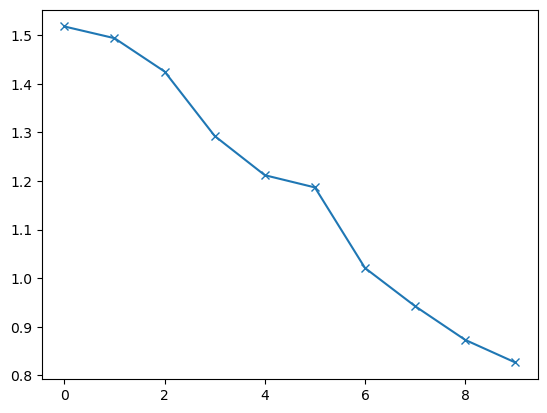

In [ ]:
#Calculate the principal angles between the two subspaces
principal_angles = scipy.linalg.subspace_angles(A1, A2)
# plot principal angles
plt.plot(range(len(principal_angles)), principal_angles,marker='x')

In [5]:
# Load the corresponding models
path_model1 = f"models/checkpoints/{name_model}/{file1}"
model1 = load_model(name_model,path_model1) # I need to dvc pull first

FileNotFoundError: [Errno 2] No such file or directory: 'models/checkpoints/PCKTAE/FMNIST_PCKTAE_50_1.pth'

In [ ]:
decoded_eigenvectors = model1.deocde(eigenvectors1)
plt.imshow(decoded_eigenvectors[0], cmap='gray')

In [47]:
dataset="FMNIST"
number_samples = [10,50]
size_of_latents = [8,16,32,64]
mapping_list = ["Linear"]
lamda_list = [0,0.1,0.01]
name_model = "VAE"
seeds = [1,2]
sampling_strategy = "equally"
results = []
#Create combination of all parameters
for seed1 in seeds:
    for seed2 in seeds:
        if seed1 != seed2:
            for num_samples in number_samples:
                for lamda in lamda_list:
                    for size_of_the_latent in size_of_latents:
                        file1 = f"{dataset}_{name_model}_{size_of_the_latent}_{seed1}"
                        file2 = f"{dataset}_{name_model}_{size_of_the_latent}_{seed2}"
                        #mapping_path = f'results/transformations/mapping_files/{name_model}/{file1}>{file2}>{mapping_name}_{num_samples}_{lamda}_{sampling_strategy}'
                        #Load mapping
                        mapping_path = get_mapping_path(name_model,file1,file2,mapping_name,num_samples,lamda,sampling_strategy,dataset)
                        mapping = load_mapping(mapping_path,mapping_name)
                        A = get_matrix_from_mapping(mapping,mapping_name)
                        #Calculate eigenvalues and eigenvectors
                        eigenvalues, eigenvectors = np.linalg.eig(A.T@A)
                        #Convert eigenvalues to real numbers
                        eigenvalues = np.real(eigenvalues)
                        eigenvectors = np.real(eigenvectors)
                        #Sort eigenvalues and eigenvectors
                        idx = eigenvalues.argsort()[::-1]
                        eigenvalues = eigenvalues[idx]
                        eigenvectors = eigenvectors[:,idx]
                        results.append({
                            "dataset": dataset,
                            "model1": file1,
                            "model2": file2,
                            "seed1": seed1,
                            "seed2":seed2,
                            "latentdim": size_of_the_latent,
                            "mapping": mapping_name,
                            "lambda": lamda,
                            "num_samples": num_samples,
                            "eigenvalues": eigenvalues,
                            "eigenvectors": eigenvectors
                            })

results = pd.DataFrame(results)

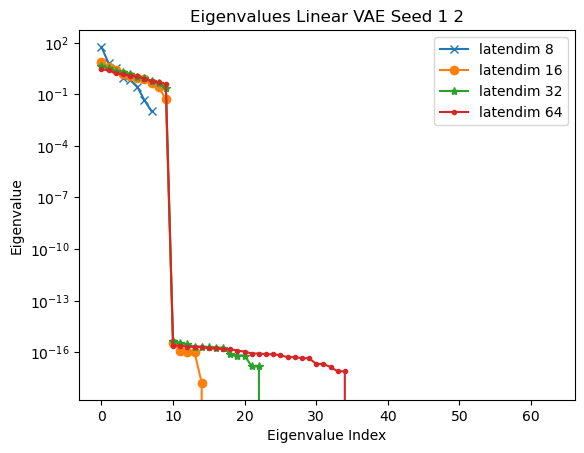

In [51]:
#Plot the eigenvalues dependent on the latent dim
markers = ['x','o','*',".","^"]
#Get eigenvalues from results dataframe where seed1 =1 seed2= 2 lamda = 0 num_samples = 10
mask = (results.seed1 == 1) & (results.seed2 == 2) & (results["lambda"] == 0) & (results.num_samples == number_samples[0])
plt.title(f"Eigenvalues {mapping_name} {name_model} Seed 1 2")

for i,latendim in enumerate(size_of_latents):
    selected_eigenvalues = results[mask & (results.latentdim == latendim)].eigenvalues.values[0]
    plt.plot(selected_eigenvalues, label=f"latendim {latendim}",marker = markers[i])


plt.yscale('log')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.legend()
plt.savefig(f"results/figures/eigenvalues_latentdim_{mapping_name}_{name_model}_seed_1_2.png")
plt.show()

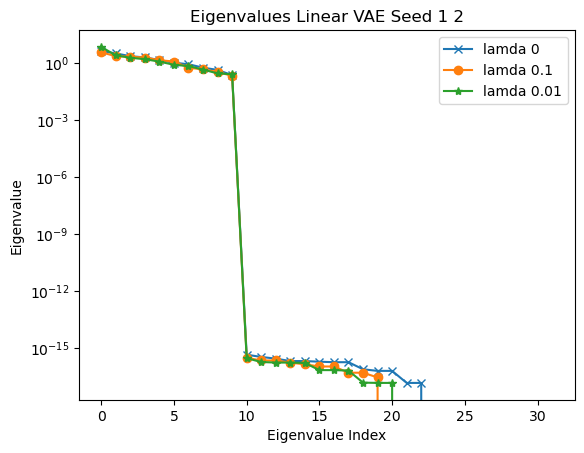

In [44]:
#Plot the eigenvalues dependent on the lamda
#Get eigenvalues from results dataframe where seed1 =1 seed2= 2 lamda = 0 num_samples = 10
mask = (results.seed1 == 1) & (results.seed2 == 2) & (results.latentdim == size_of_latents[2]) & (results.num_samples == number_samples[0])
plt.title(f"Eigenvalues {mapping_name} {name_model} Seed 1 2")
for i,lamda in enumerate(lamda_list):
    selected_eigenvalues = results[mask & (results["lambda"] == lamda)].eigenvalues.values[0]
    plt.plot(selected_eigenvalues, label=f"lamda {lamda}",marker = markers[i])

plt.yscale('log')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.legend()
plt.savefig(f"results/figures/eigenvalues_lambda_{mapping_name}_{name_model}_seed_1_2.png")
plt.show()

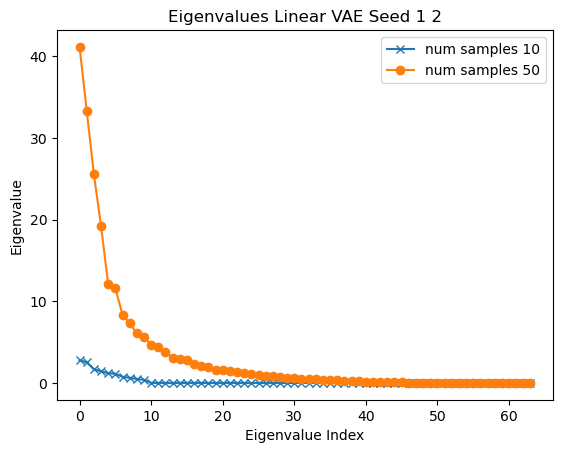

In [49]:
#Plot the eigenvalues dependent on the num_samples
#Get eigenvalues from results dataframe where seed1 =1 seed2= 2 lamda = 0 num_samples = 10
mask = (results.seed1 == 1) & (results.seed2 == 2) & (results.latentdim == size_of_latents[3]) & (results["lambda"] == 0.0)

plt.title(f"Eigenvalues {mapping_name} {name_model} Seed 1 2")
for i,num_sample in enumerate(number_samples):
    selected_eigenvalues = results[mask & (results.num_samples == num_sample)].eigenvalues.values[0]
    plt.plot(selected_eigenvalues, label=f"num samples {num_sample}",marker = markers[i])

#plt.yscale('log')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.legend()
plt.savefig(f"results/figures/eigenvalues_num_samples_{mapping_name}_{name_model}_seed_1_2.png")
plt.show()